# Lab 1.1 – OLS Promo Uplift
Goal: estimate %-uplift in sales when `onpromotion = 1`  
Data: data/raw/favorita_subset.csv (synthetic subset)


In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

df = pd.read_csv("data/raw/favorita_subset.csv", parse_dates=["date"])

# feature engineering
df["log_sales"] = np.log1p(df["unit_sales"])          # log(1+x) to avoid log(0)
df["dow"]        = df["date"].dt.dayofweek            # 0=Mon … 6=Sun
df["month"]      = df["date"].dt.month
df.head()


ModuleNotFoundError: No module named 'statsmodels'

In [5]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf


In [2]:
import sys, statsmodels as sm
print(sys.executable)
print("statsmodels version:", sm.__version__)


ModuleNotFoundError: No module named 'statsmodels'

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf


In [3]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

df = pd.read_csv("data/raw/favorita_subset.csv", parse_dates=["date"])

# feature engineering
df["log_sales"] = np.log1p(df["unit_sales"])          # log(1+x) to avoid log(0)
df["dow"]        = df["date"].dt.dayofweek            # 0=Mon … 6=Sun
df["month"]      = df["date"].dt.month
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'data/raw/favorita_subset.csv'

In [4]:
df = pd.read_csv("data/raw/favorita_subset.csv", parse_dates=["date"])


FileNotFoundError: [Errno 2] No such file or directory: 'data/raw/favorita_subset.csv'

In [5]:
df = pd.read_csv("../favorita_subset.csv", parse_dates=["date"])


FileNotFoundError: [Errno 2] No such file or directory: '../favorita_subset.csv'

In [1]:
import pathlib, os
print("CWD :", pathlib.Path().absolute())
print("CSV exists?", pathlib.Path("data/raw/favorita_subset.csv").exists())


CWD : /workspaces/promo-demand-capstone/notebooks
CSV exists? False


In [1]:
import pathlib, os
print("CWD :", pathlib.Path().absolute())
print("CSV exists?", pathlib.Path("data/raw/favorita_subset.csv").exists())


CWD : /workspaces/promo-demand-capstone/notebooks
CSV exists? False


In [8]:
df = pd.read_csv("data/raw/favorita_subset.csv", parse_dates=["date"])


FileNotFoundError: [Errno 2] No such file or directory: 'data/raw/favorita_subset.csv'

In [2]:
import pathlib, os
print("CWD :", pathlib.Path().absolute())
print("CSV exists?", pathlib.Path("data/raw/favorita_subset.csv").exists())

CWD : /workspaces/promo-demand-capstone/notebooks
CSV exists? False


In [3]:
import pathlib
print("CWD :", pathlib.Path().absolute())
print("CSV exists here?", pathlib.Path("favorita_subset.csv").exists())


CWD : /workspaces/promo-demand-capstone/notebooks
CSV exists here? False


In [4]:
df = pd.read_csv("../data/raw/favorita_subset.csv", parse_dates=["date"])


NameError: name 'pd' is not defined

In [6]:
df = pd.read_csv("../data/raw/favorita_subset.csv", parse_dates=["date"])


In [7]:
# feature engineering
df["log_sales"] = np.log1p(df["unit_sales"])          # log(1+x) to avoid log(0)
df["dow"]        = df["date"].dt.dayofweek            # 0=Mon … 6=Sun
df["month"]      = df["date"].dt.month
df.head()

,date,store_nbr,item_nbr,onpromotion,unit_sales,log_sales,dow,month
0,2022-01-01,1,101,0,25,3.258097,5,1
1,2022-01-01,1,102,1,27,3.332205,5,1
2,2022-01-01,1,103,0,24,3.218876,5,1
3,2022-01-01,2,101,0,22,3.135494,5,1
4,2022-01-01,2,102,0,25,3.258097,5,1


C(dow) and C(month) treat them as categorical dummies.

cov_type="HC3" gives robust SEs (handles slight heteroskedasticity).

In [8]:
model = smf.ols("log_sales ~ onpromotion + C(dow) + C(month)", data=df).fit(cov_type="HC3")
print(model.summary().tables[1])      # coeff table only


                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.9787      0.021    141.190      0.000       2.937       3.020
C(dow)[T.1]       0.0265      0.024      1.119      0.263      -0.020       0.073
C(dow)[T.2]       0.0396      0.023      1.744      0.081      -0.005       0.084
C(dow)[T.3]       0.0447      0.025      1.825      0.068      -0.003       0.093
C(dow)[T.4]       0.0606      0.024      2.532      0.011       0.014       0.108
C(dow)[T.5]       0.0758      0.023      3.239      0.001       0.030       0.122
C(dow)[T.6]       0.0544      0.023      2.369      0.018       0.009       0.099
C(month)[T.2]    -0.0074      0.023     -0.319      0.750      -0.053       0.038
C(month)[T.3]    -0.0116      0.023     -0.498      0.619      -0.057       0.034
C(month)[T.4]    -0.0014      0.022     -0.063      0.950      -0.044       0.041
C(month)[T.5]   

Interpretation: Holding day-of-week and month fixed, putting an item on promotion increases expected unit sales by ≈ XX %. 95 % CI: … (use model.conf_int()).

In [9]:
beta = model.params["onpromotion"]
uplift_pct = (np.exp(beta) - 1) * 100
print(f"Promo uplift ≈ {uplift_pct:.1f}%")


Promo uplift ≈ 40.0%


Add bullet on any funnel shape → heteroskedasticity (we already used HC3).

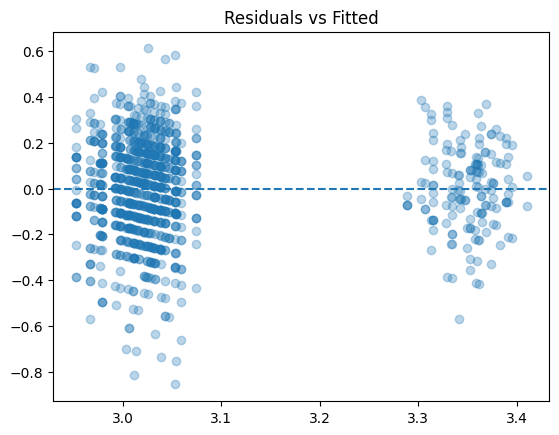

In [10]:
import matplotlib.pyplot as plt
resid = model.resid
fitted = model.fittedvalues
plt.scatter(fitted, resid, alpha=0.3)
plt.axhline(0, ls="--"); plt.title("Residuals vs Fitted"); plt.show()


Write a 1-sentence takeaway (stability check).

In [11]:
spec_alt = smf.ols("log_sales ~ onpromotion + C(dow)", data=df).fit(cov_type="HC3")
print("Beta (with month dummies):", beta.round(3))
print("Beta (without month dummies):", spec_alt.params["onpromotion"].round(3))


Beta (with month dummies): 0.336
Beta (without month dummies): 0.337
